In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from pandasql import sqldf

In [2]:
url='https://www.mycarhelpline.com/index.php?option=com_easyblog&view=entry&id=808&Itemid=91'


In [3]:
page2=pd.read_html(url)

In [4]:
table=page2[3]
table=table.rename(columns=table.iloc[0])
table.drop([0],inplace=True)
table.head()

,Month Year,Petrol / Litre,Diesel / Litre,Fuel Price Difference / Litre
1,April-03,Rs 33.49,Rs 22.12,Rs 11.37
2,June-04,Rs 35.71,Rs 22.74,Rs 12.97
3,April-05,Rs 37.99,Rs 28.22,Rs 9.77
4,Apr-06,Rs 43.5,Rs 30.45,Rs 13.05
5,Apr-07,Rs 43,Rs 30.25,Rs 12.75


In [5]:
df=table[['Month Year','Petrol / Litre', 'Diesel / Litre']]
df.head()

,Month Year,Petrol / Litre,Diesel / Litre
1,April-03,Rs 33.49,Rs 22.12
2,June-04,Rs 35.71,Rs 22.74
3,April-05,Rs 37.99,Rs 28.22
4,Apr-06,Rs 43.5,Rs 30.45
5,Apr-07,Rs 43,Rs 30.25


In [6]:
for i in range(len(df)):
    df.loc[i+1,'Petrol / Litre']=float((df.loc[i+1,'Petrol / Litre'])[3:])
    df.loc[i+1,'Diesel / Litre']=float((df.loc[i+1,'Diesel / Litre'])[3:])
    df.loc[i+1,'Month Year']=int('20'+df.loc[i+1,'Month Year'][-2:])


/tmp/ipykernel_58059/1844539089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[i+1,'Petrol / Litre']=float((df.loc[i+1,'Petrol / Litre'])[3:])
/tmp/ipykernel_58059/1844539089.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[i+1,'Diesel / Litre']=float((df.loc[i+1,'Diesel / Litre'])[3:])
/tmp/ipykernel_58059/1844539089.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[i+1,'Month Year']=int('20'+df.loc[i+1,

In [7]:
df.head()

,Month Year,Petrol / Litre,Diesel / Litre
1,2003,33.49,22.12
2,2004,35.71,22.74
3,2005,37.99,28.22
4,2006,43.5,30.45
5,2007,43.0,30.25


In [8]:
df.columns=['year','petrol','diesel']

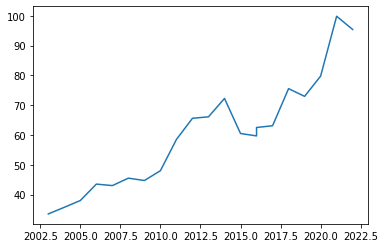

In [9]:
plt.plot(df['year'],df['petrol'])

In [10]:
df=df.drop([14])
df

,year,petrol,diesel
1,2003,33.49,22.12
2,2004,35.71,22.74
3,2005,37.99,28.22
4,2006,43.5,30.45
5,2007,43.0,30.25
6,2008,45.5,31.76
7,2009,44.7,30.86
8,2010,48.0,38.1
9,2011,58.5,37.75
10,2012,65.6,40.91


In [11]:
inflation=pd.read_html('https://www.macrotrends.net/countries/IND/india/inflation-rate-cpi')[1]
inflation.head()

India Inflation Rate - Historical Data                                 
                                    Year Inflation Rate (%) Annual Change
0                                   2020              6.62%         2.90%
1                                   2019              3.72%        -0.22%
2                                   2018              3.95%         0.62%
3                                   2017              3.33%        -1.62%
4                                   2016              4.95%         0.04%

In [12]:
inflation.columns

MultiIndex([('India Inflation Rate - Historical Data',               'Year'),
            ('India Inflation Rate - Historical Data', 'Inflation Rate (%)'),
            ('India Inflation Rate - Historical Data',      'Annual Change')],
           )

In [13]:
inflation=inflation.droplevel(level=0,axis=1)

In [14]:
inflation.columns=['year','inflation_rate', 'annual_change']

In [15]:
inflation=inflation.drop(columns=['annual_change'])

In [16]:
inflation=inflation.where(inflation['year']>2002)
inflation=inflation.dropna()

In [17]:
inflation['year']=inflation['year'].astype(int)

In [18]:
inflation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year            18 non-null     int64 
 1   inflation_rate  18 non-null     object
dtypes: int64(1), object(1)
memory usage: 432.0+ bytes


In [19]:
for i in range(len(inflation)):
    inflation.loc[i,'inflation_rate'] = inflation.loc[i,'inflation_rate'][:-1]


In [20]:
inflation['inflation_rate']=inflation['inflation_rate'].astype(float)

In [21]:
inflation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            18 non-null     int64  
 1   inflation_rate  18 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 988.0 bytes


In [22]:
len(df),len(inflation)

(20, 18)

In [23]:
df.tail(),inflation.head()

(    year petrol diesel
 17  2018  75.55  67.38
 18  2019  72.96  66.69
 19  2020  79.76  79.88
 20  2021  99.86  89.36
 21  2022  95.41  86.67,
    year  inflation_rate
 0  2020            6.62
 1  2019            3.72
 2  2018            3.95
 3  2017            3.33
 4  2016            4.95)

In [24]:
add_inflation=np.array([[2021,np.random.uniform(4.5,inflation['inflation_rate'][:9].mean())],
                        
        [2022,np.random.uniform(4.5,inflation['inflation_rate'][:9].mean())


        ]])

add_inflation=pd.DataFrame(add_inflation,columns=['year','inflation_rate'])
add_inflation['year']=add_inflation['year'].astype(int)
add_inflation

,year,inflation_rate
0,2021,4.750812
1,2022,5.555577


In [25]:
final_inflation=pd.concat([add_inflation,inflation],ignore_index=True)
final_inflation.head()

,year,inflation_rate
0,2021,4.750812
1,2022,5.555577
2,2020,6.620000
3,2019,3.720000
4,2018,3.950000


In [26]:
final_data=sqldf('''select df.year,df.petrol,
      final_inflation.inflation_rate
      from df left join final_inflation on df.year=final_inflation.year''')

final_data

,year,petrol,inflation_rate
0,2003,33.49,3.810000
1,2004,35.71,3.770000
2,2005,37.99,4.250000
3,2006,43.50,5.800000
4,2007,43.00,6.370000
5,2008,45.50,8.350000
6,2009,44.70,10.880000
7,2010,48.00,11.990000
8,2011,58.50,8.860000
9,2012,65.60,9.310000


In [27]:
inflation_adjusted_petrol_real=[]
initial_price=final_data['petrol'][0]
inflation_adjusted_petrol_real.append(initial_price)

for i in range(len(final_data)-1):
    x=initial_price*(final_data['inflation_rate'][i+1] / 100 )
    initial_price+=x
    inflation_adjusted_petrol_real.append(initial_price)
    


final_data['inflation_adjusted_petrol']=inflation_adjusted_petrol_real

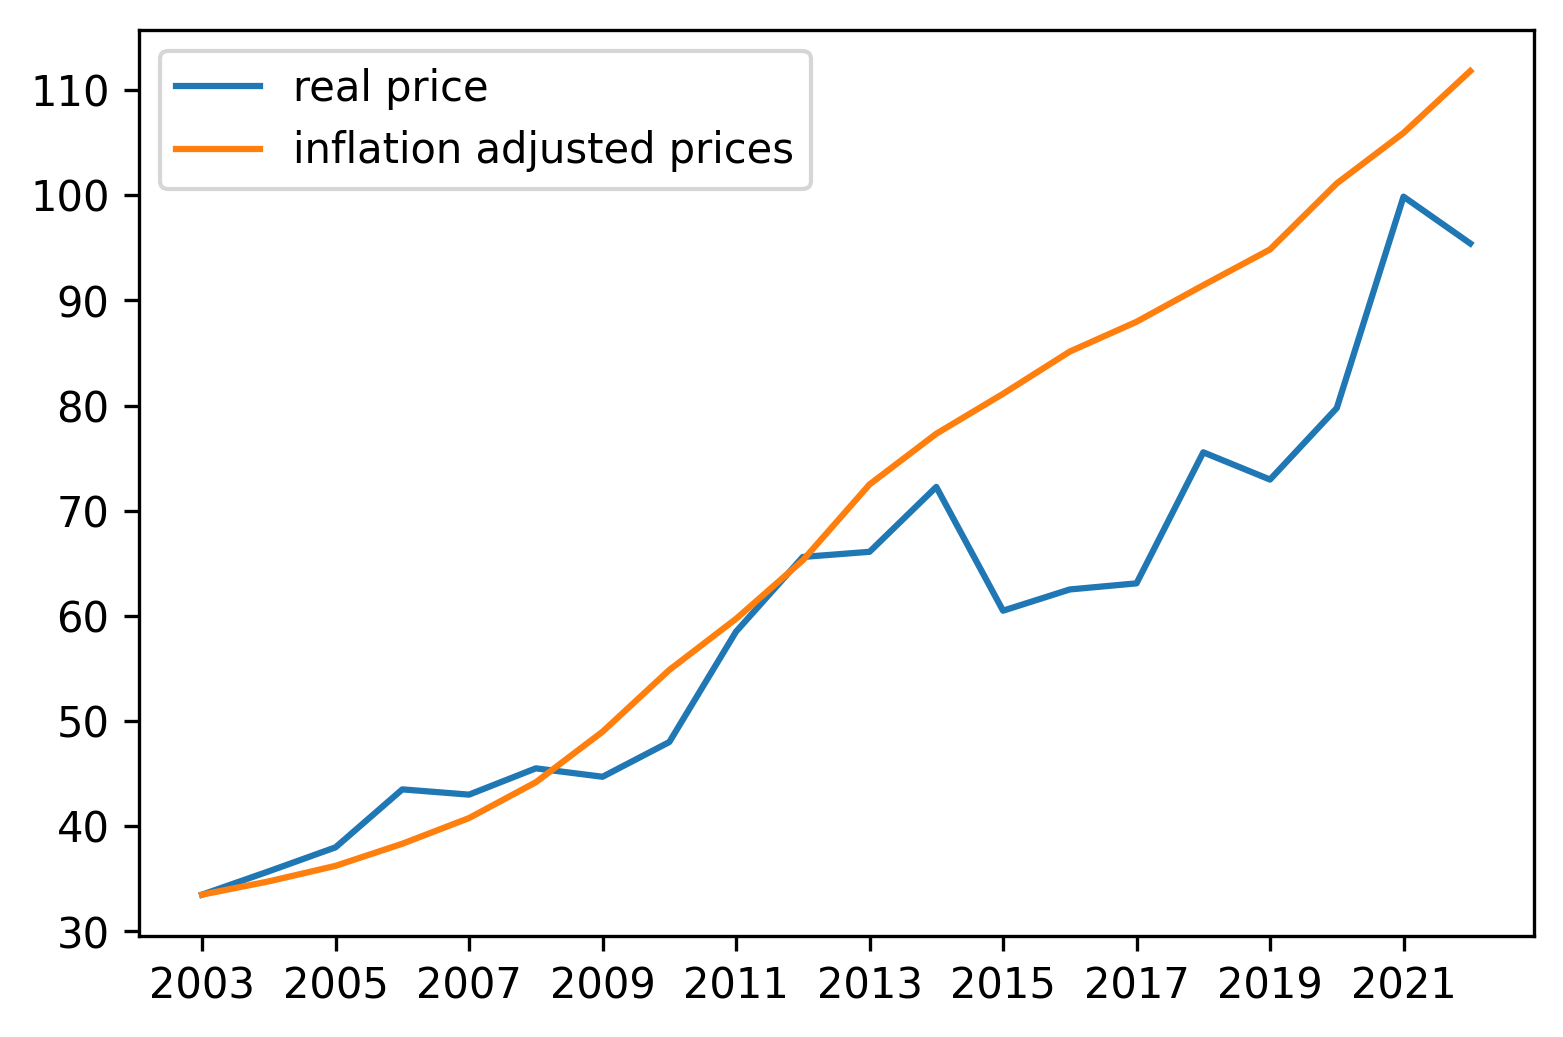

In [28]:
plt.rcParams['figure.dpi']=300
plt.rcParams['savefig.dpi']=500
fig,ax=plt.subplots()
ax.plot(final_data['year'],final_data['petrol'],label='real price')
# ax.set_label=('real price')

ax.plot()

ax.plot(final_data['year'],final_data['inflation_adjusted_petrol'],label='inflation adjusted prices')
# ax.set_label=('inflation adjusted prices')
ax.plot()


ax.set_xticks([i for i in range(2003,2022,2)])

plt.legend()

plt.savefig('petrol_prices_inflation.png',)

# observations

#### we can observe that from 2003 to 2014 petrol prices were very much rising with the inflation

#### then they fall drastically for few years, only to sharply rise again around about 2017

#### finally around 2020 they were very much in sync with the inflation rate